# 図、outputを貼り付けしてあるだけなので実行はしないこと

## 1. set alpha value

In [64]:
p4 <- DimPlot(data, group.by='institution')+NoAxes()+
theme(text = element_text(size=28))+
ggtitle('Institution')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



### ここではinstitution == 'Stanford'の場合、alpha=1, 他では0.25に設定した

In [74]:
p4$layers[[1]]$aes_params$alpha = ifelse ( data@meta.data$institution == "Stanford", 1, .25 )

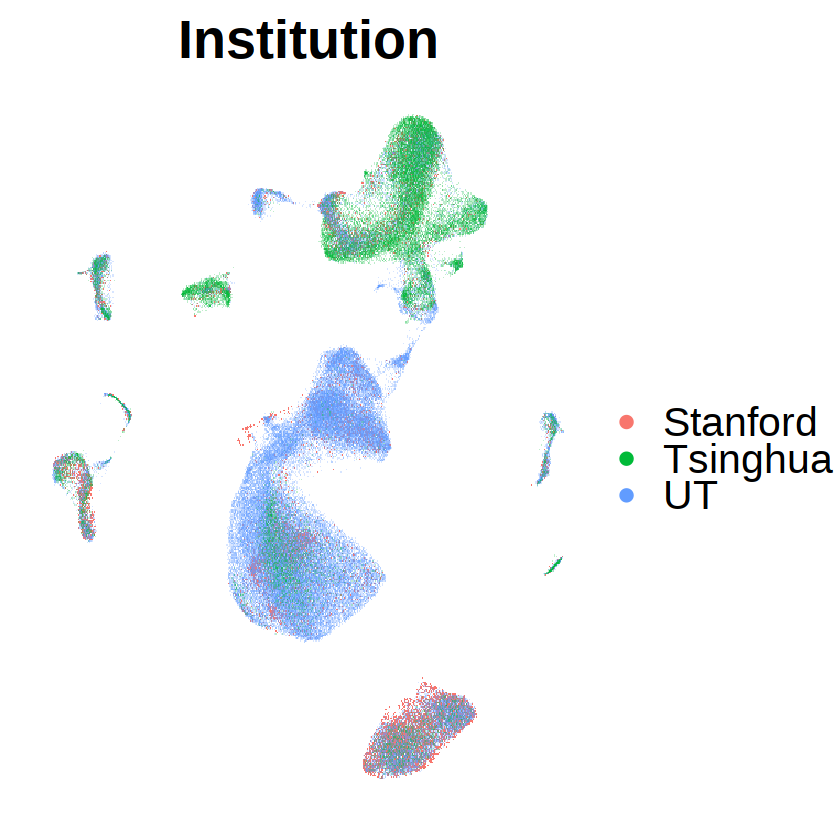

In [68]:
options(repr.plot.width=7, repr.plot.height=7)
p4

## 2. Dotplot

In [20]:
#reorder clusters 
seurat@active.ident <- factor(seurat@active.ident, 
                            levels=rev(c("GKN+F", 
                                         'ADH1+GKN1-F',
                                "PG/Neck1",
                                         'PG/Neck2',
                                     "Chief",
                                     "PC", 
                                      'Ent',
                                         'Gob',
                                         'Pr_epi',
                                         'NE1',
                                         'NE2'))
                           )

In [102]:
p2 <- DotPlot(seurat,features = (unique(marker.genes)))+
guides(color = guide_colorbar(title = 'avg.exp'))+ # add the color bar with label ('avg.exp')
guides(size = guide_legend(title = '%.exp')) + # add the circle with label ('%.exp')
scale_color_gradient2(low = "blue", high = "red")+ # designate color bar low=blue, high=red
  geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.5) + # add contour to circles
ggtitle('')+
xlab('')+
ylab('')+
    theme_bw()+
NoGrid()+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5), # rotate x-axis lab (angle=90), and locate the lab in the middle 
     plot.title=element_text(family="Times", face="bold", colour="brown",size=0,hjust = 0.5), # title option
      text=element_text(size=18)) # text size

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



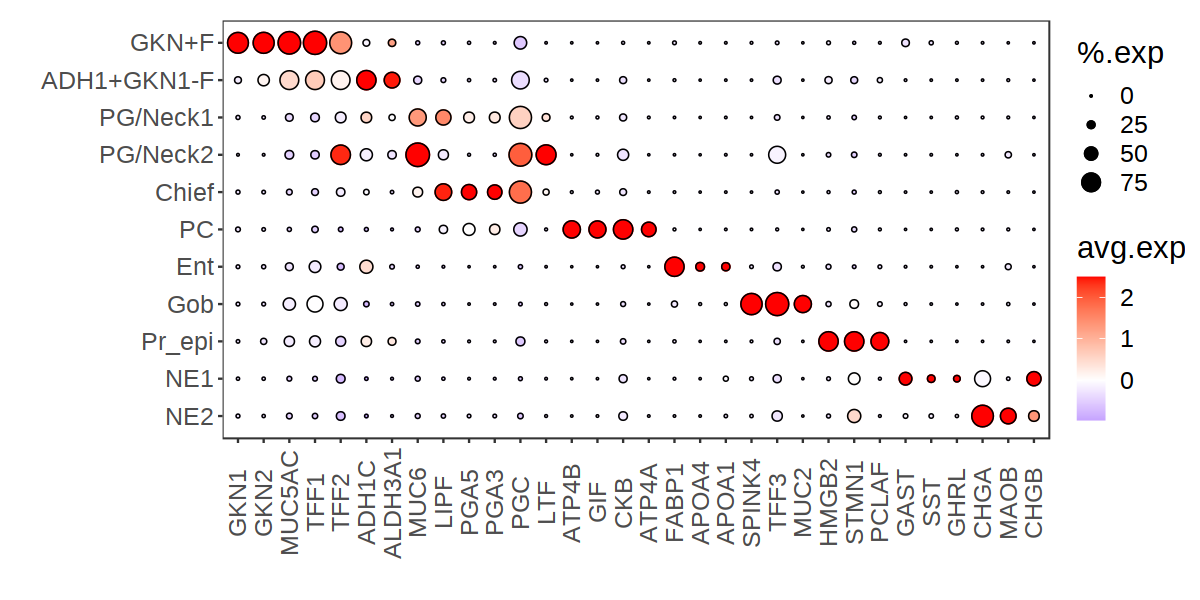

In [103]:
p2

## 3. volcano plot

In [1]:
vol <- read.table(file="PG_Neck2.tsv", sep="\t", # from BBrowser
           header=T,       #1行目を列名として取り込む場合
     #      rownames=1    #1列目を行名として取り込む場合
           )

In [5]:
head(vol)

,x,y,Feature,Type
,<dbl>,<dbl>,<chr>,<chr>
1,-5.155,75.36329,PGC,Down
2,3.639,71.02061,OLFM4,Up
3,2.736,70.05057,CLDN4,Up
4,2.722,57.71306,LEFTY1,Up
5,1.715,47.87666,S100A10,Up
6,1.609,44.75119,BTF3,Up


In [370]:
suppressPackageStartupMessages(library(ggrepel))

In [421]:
# Define the "volcano_plot" function
volcano_plot <- function(vol){
    topn <- rbind(vol %>% filter(Type=='Up') %>% top_n(4,y),vol %>% filter(Type=='Down') %>% top_n(5,y))
  ggplot(vol, aes(x = x, y = y)) +
    geom_point(size = 3, aes(color = Type)) +
    scale_color_manual(values = c("blue", "grey","red")) +
    theme(legend.position = "none") +
    geom_text_repel(
      data =topn[topn$Feature!='LEFTY1',],
      aes(label = Feature), size = 6, box.padding = unit(0.15, "lines"),
      point.padding = unit(0.15, "lines")) +
    geom_text_repel(
      data =topn[topn$Feature=='LEFTY1',],
      aes(label = Feature), size = 6, box.padding = unit(0.15, "lines"),
      point.padding = unit(0.15, "lines"),
    fontface = 'bold')+    labs(x = "Log2FoldChange", y = "-log10(padj)")
}

In [385]:
index <- vol$significant == 'Not Sig'

In [386]:
vol$Type[index] <- 'Not Sig'

In [381]:
# set thresholds
padj <- 0.05
logFC <- 0.5
vol$significant <- ifelse(vol$y > -log2(0.05) & abs(vol$x) > logFC,
                            paste0("FDR<", padj) , "Not Sig")

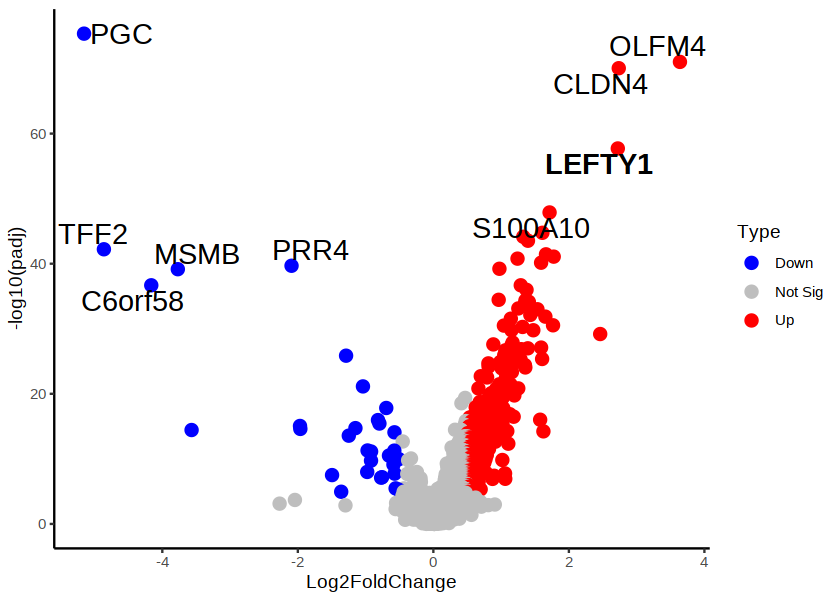

In [428]:
options(repr.plot.width=7, repr.plot.height=5)
volcano_plot(vol)+ theme_classic() #+ geom_vline(xintercept=0)

## 4. Cell statistics

In [58]:
aaa

An object of class Seurat 
33538 features across 39169 samples within 1 assay 
Active assay: RNA (33538 features, 4000 variable features)
 4 dimensional reductions calculated: pca, harmony, tsne, umap

In [59]:
grepl('Bcell',aaa@meta.data$orig.ident) %>% table

.
FALSE  TRUE 
33040  6129 

In [60]:
Idents(aaa) %>% unique

[1] Chief       PG/Neck1    GKN+F       PG/Neck2    PC          Pr_epi     
 [7] ADH1+GKN1-F NE2         NE1         Ent         Gob        
11 Levels: ADH1+GKN1-F PG/Neck2 Chief PG/Neck1 GKN+F PC Pr_epi NE2 NE1 ... Gob

In [61]:
aaa <- RenameIdents(aaa, 'LEFTY1+ADH+F'='ADH1+GKN1-F',
                   'LEFTY1+PG/Neck'='PG/Neck2')

ERROR: Error in RenameIdents.Seurat(aaa, `LEFTY1+ADH+F` = "ADH1+GKN1-F", `LEFTY1+PG/Neck` = "PG/Neck2"): Cannot find any of the provided identities


In [62]:
aaa@meta.data['subcluster'] <- Idents(aaa) 

In [63]:
data2 <- aaa[,!grepl('Bcell',aaa@meta.data$orig.ident)]

In [64]:
data2@meta.data['IM_severeness'] <- 'mild'
Idents(data2) <- 'patient'
severe_label <- colnames(subset(data2,idents = c('IMS1','IMS2','IMS3','IMS4','10','11','14')))
moderate_label <- colnames(subset(data2,idents = c('16','3','9','6207','6592','IMW1','IMW2')))
data2@meta.data['IM_severeness'][severe_label,] <- "severe"
data2@meta.data['IM_severeness'][moderate_label,] <- "moderate"

In [65]:
data2@meta.data$orig.ident %>% unique

[1] "Stanford_5846N1-total"    "Stanford_5866N1-total"   
 [3] "Stanford_5866N2-total"    "Stanford_5931N1-total"   
 [5] "Stanford_5931N2-total"    "Stanford_6207N1-total"   
 [7] "Stanford_6342N1-total"    "Stanford_6592N1-total"   
 [9] "Stanford_6649N1-total"    "Stanford_6649T1-total"   
[11] "Stanford_6709N1-total"    "10N-total"               
[13] "11N-total"                "12N-total"               
[15] "14N-total"                "15N-total"               
[17] "16N-total"                "17N-total"               
[19] "3N-total"                 "4N-total"                
[21] "5N-total"                 "5T-total"                
[23] "6N-total"                 "8N-total"                
[25] "9N-total"                 "Tsinghua_12320047M-total"
[27] "Tsinghua_12320048M-total" "Tsinghua_12320049M-total"
[29] "Tsinghua_12320050M-total" "Tsinghua_12320051M-total"
[31] "Tsinghua_12320052M-total" "Tsinghua_12320054M-total"
[33] "Tsinghua_12320055M-total" "Tsinghua_12320056M-total"
[35] "Tsinghua_12320057M-total" "Tsinghua_12320058M-total"

In [66]:
dt <- as.data.frame(rep(0,length(data2@meta.data$major_clusters %>% unique)))

In [67]:
data2@meta.data$subcluster %>% unique

[1] Chief       PG/Neck1    GKN+F       PG/Neck2    PC          Pr_epi     
 [7] ADH1+GKN1-F NE2         NE1         Ent         Gob        
11 Levels: ADH1+GKN1-F PG/Neck2 Chief PG/Neck1 GKN+F PC Pr_epi NE2 NE1 ... Gob

In [68]:
colnames(dt) <- 'count'

In [69]:
rownames(dt) <- data2@meta.data$major_clusters %>% unique

In [70]:
dt2 <- as.data.frame(table(data2@meta.data$major_clusters))

In [71]:
rownames(dt2) <- dt2[,1]

In [72]:
dt2 <- dt

In [73]:
data2@meta.data %>% colnames

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "contami_frac"    
 [5] "percent.mt"       "ident"            "RNA_snn_res.0.5"  "seurat_clusters" 
 [9] "TN"               "patient"          "replicate"        "subtype"         
[13] "celltype_singleR" "cxds_score"       "bcds_score"       "hybrid_score"    
[17] "cells.use"        "RNA_snn_res.0.8"  "institution"      "major_clusters"  
[21] "RNA_snn_res.0.7"  "subcluster"       "S.Score"          "G2M.Score"       
[25] "Phase"            "CytoTRACE"        "IM_severeness"

In [74]:
metadata <- data2@meta.data

In [75]:
metadata['methods'] = 'biopsy'

In [76]:
metadata[metadata['institution']=='UT',]['methods'] <- 'surgical'

In [77]:
metadata[metadata['institution']=='Stanford',]['methods'] <- 'surgical'
metadata[metadata['patient']==6649,]['methods'] <- 'biopsy'

In [78]:
df_stad = data.frame(sample=metadata['orig.ident'], 
                    patient=metadata['patient'],
                    institution=metadata['institution'], 
                    #IM_N=metadata['IM_N'],
                 IM_severeness = metadata['IM_severeness'],
                    methods=metadata['methods'],
                     subcluster=metadata['subcluster'],
                    cluster=Idents(data2))

#df_stad[df_stad$TN %in% c('CAG',"IM","IMS","IMW","NAG"),"TN"] = "N"
#df_stad[df_stad$TN %in% c('EGC'),"TN"] = "T"
#df_stad[df_stad$cluster == "Undermined","cluster"] = "Undetermined"
#df_stad$TN = as.character(df_stad$TN)

#df_stad = subset(df_stad, TN != 'PBMC') #remove PBMC

colors <- readRDS("../distinct_colors.Rds")

In [79]:
df_stad <- transform(df_stad, patient= factor(patient, levels = c('3',"4","5","6","7","8","9","10","11",
                                                                 "12","14","15","16","17","18","5846","5866",
                                                                 "5931","6207","6342","6592","6709","6649",
                                                                 "NAG1","NAG2","NAG3","CAG1","CAG2","CAG3",
                                                                  "IMW1","IMW2","IMS1","IMS2","IMS3","IMS4",
                                                                  "EGC")))

In [80]:
unlist(colors[10])

[1] "#DA7286" "#A0E2B9" "#DC61CA" "#A345E1" "#9F90DA" "#D8A76B" "#D6DF64"
 [8] "#DACBD1" "#78BBCE" "#7DE369"

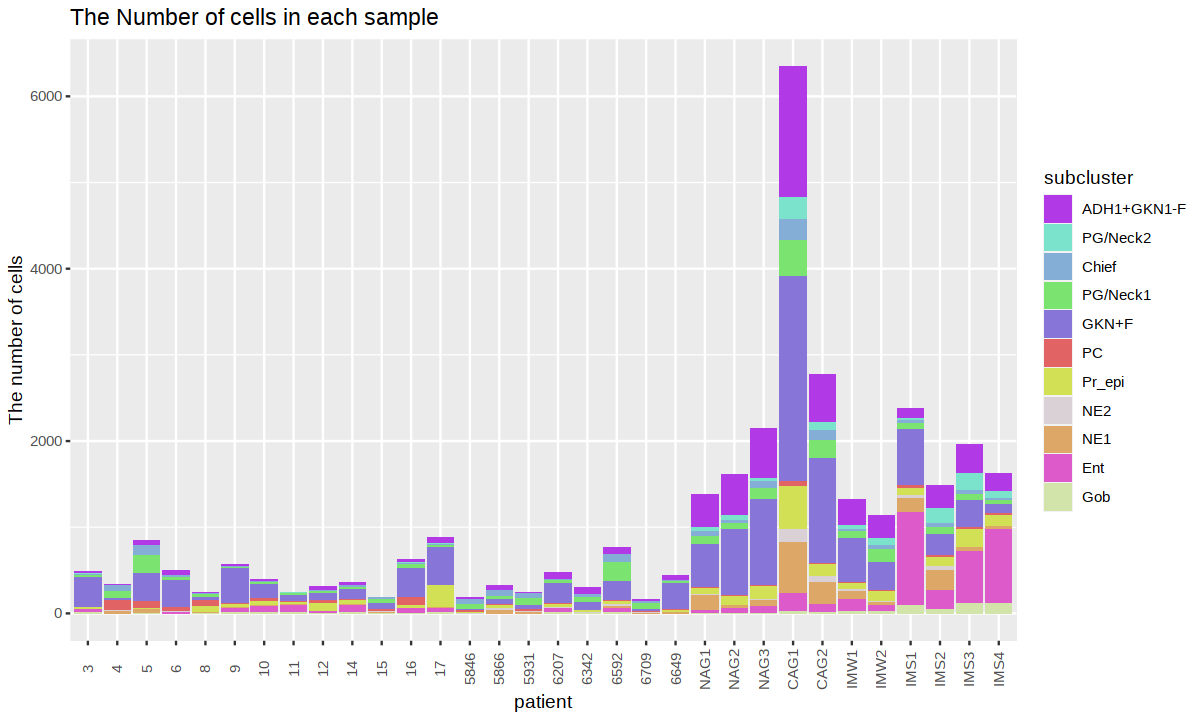

In [81]:
options(repr.plot.width=10, repr.plot.height=6)

ggplot(df_stad, aes(x=patient, fill=subcluster)) +
geom_bar(aes(y = (..count..))) +
ggtitle("The Number of cells in each sample")+
#facet_grid(TN~TB) + 
scale_y_continuous() +
xlab("patient") +
ylab("The number of cells") + 
#opts(axis.text.x=theme_text(angle=90)) +
theme(axis.text.x = element_text(angle = 90, vjust=0.5)) +
scale_fill_manual(values = unlist(colors[13]))
#ggsave("/home/tsubosaka/integrated_data/fig/num_celltypes_samples.pdf", width=10,height=5)

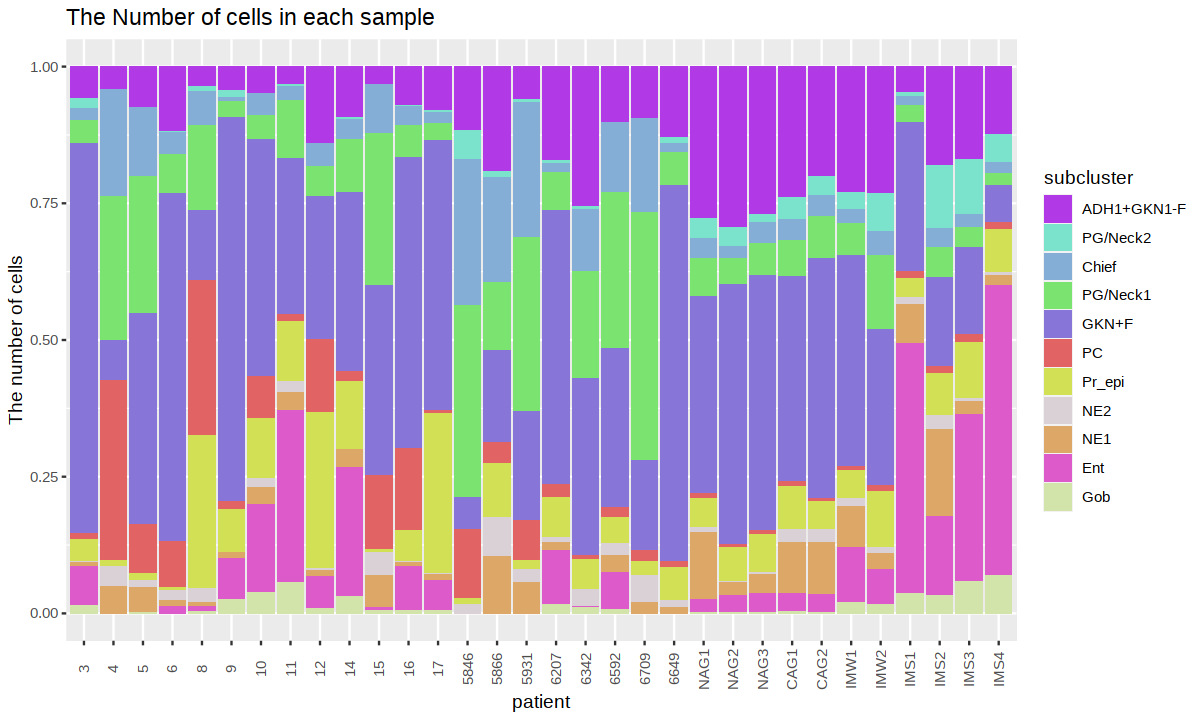

In [82]:
options(repr.plot.width=10, repr.plot.height=6)

ggplot(df_stad, aes(x=patient, fill=subcluster)) +
geom_bar(aes(y = (..count..)),position='fill') +
ggtitle("The Number of cells in each sample")+
#facet_grid(TN~TB) + 
scale_y_continuous() +
xlab("patient") +
ylab("The number of cells") + 
#opts(axis.text.x=theme_text(angle=90)) +
theme(axis.text.x = element_text(angle = 90, vjust=0.5)) +
scale_fill_manual(values = unlist(colors[13]))
#ggsave("/home/tsubosaka/integrated_data/fig/num_celltypes_samples.pdf", width=10,height=5)

In [83]:
options(repr.plot.width=4, repr.plot.height=6)

p3 <- ggplot(df_stad, aes(x=methods, fill=subcluster,y=..count..)) +
geom_bar(aes(y = (..count..)),position='fill') +
ggtitle("")+
#facet_grid(TN~TB) + 
scale_y_continuous() +
xlab("Procedure") +
ylab("Propotion of total (%)") + 
NoLegend()+
#opts(axis.text.x=theme_text(angle=90)) +
theme(axis.text.x = element_text(angle = 90, vjust=0.5),text = element_text(size=18)) +
scale_fill_manual(values = unlist(colors[13]))
#ggsave("/home/tsubosaka/integrated_data/fig/num_celltypes_samples.pdf", width=10,height=5)

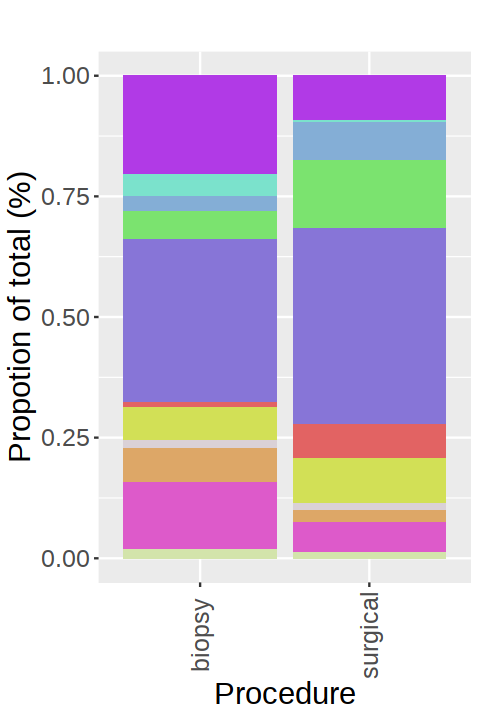

In [84]:
p3

In [85]:
options(repr.plot.width=4, repr.plot.height=6)

p5 <- ggplot(df_stad, aes(x=institution, fill=subcluster,y=..count..)) +
geom_bar(aes(y = (..count..)),position='fill') +
ggtitle("")+
#facet_grid(TN~TB) + 
scale_y_continuous() +
xlab("Institution") +
ylab("") + 
NoLegend() +
#opts(axis.text.x=theme_text(angle=90)) +
theme(axis.text.x = element_text(angle = 90, vjust=0.5),text = element_text(size=18)) +
scale_fill_manual(values = unlist(colors[13]))
#ggsave("/home/tsubosaka/integrated_data/fig/num_celltypes_samples.pdf", width=10,height=5)

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)

p3 <- ggplot(df_stad, aes(x=methods, fill=cluster,y=..count..)) +
geom_bar(aes(y = (..count..)),position='fill') +
ggtitle("")+
#facet_grid(TN~TB) + 
scale_y_continuous(expand = c( 0, 0 ) ) +
xlab("") +
ylab("Propotion of total (%)") + 
theme_classic()+ 
#opts(axis.text.x=theme_text(angle=90)) +
theme(text = element_text(size=22),legend.position = 'bottom',panel.border = element_rect(fill = NA, size=1),
     axis.line = element_line(size = 0)) +
NoGrid()+
scale_fill_manual(values = unlist(colors[10]))
#ggsave("/home/tsubosaka/integrated_data/fig/num_celltypes_samples.pdf", width=10,height=5)

In [96]:
options(repr.plot.width=4, repr.plot.height=6)

p6 <- ggplot(df_stad, aes(x=IM_severeness, fill=subcluster,y=..count..)) +
geom_bar(aes(y = (..count..)),position='fill') +
ggtitle("")+
#facet_grid(TN~TB) + 
scale_y_continuous(expand = c( 0, 0 ) )+
xlab("") +
ylab("") + 
NoGrid()+
theme_classic()+ 
#opts(axis.text.x=theme_text(angle=90)) +
theme(text = element_text(size=20),legend.title=element_text(size=0),legend.text=element_text(size=18),legend.position = 'bottom',panel.border = element_rect(fill = NA, size=1)) +
scale_fill_manual(values = unlist(colors[13]))
#ggsave("/home/tsubosaka/integrated_data/fig/num_celltypes_samples.pdf", width=10,height=5)

In [99]:
pdf('F1I.pdf',width = 10, height = 5)
options(repr.plot.width=10, repr.plot.height=5)
p6&coord_flip()
dev.off()

png 
  2

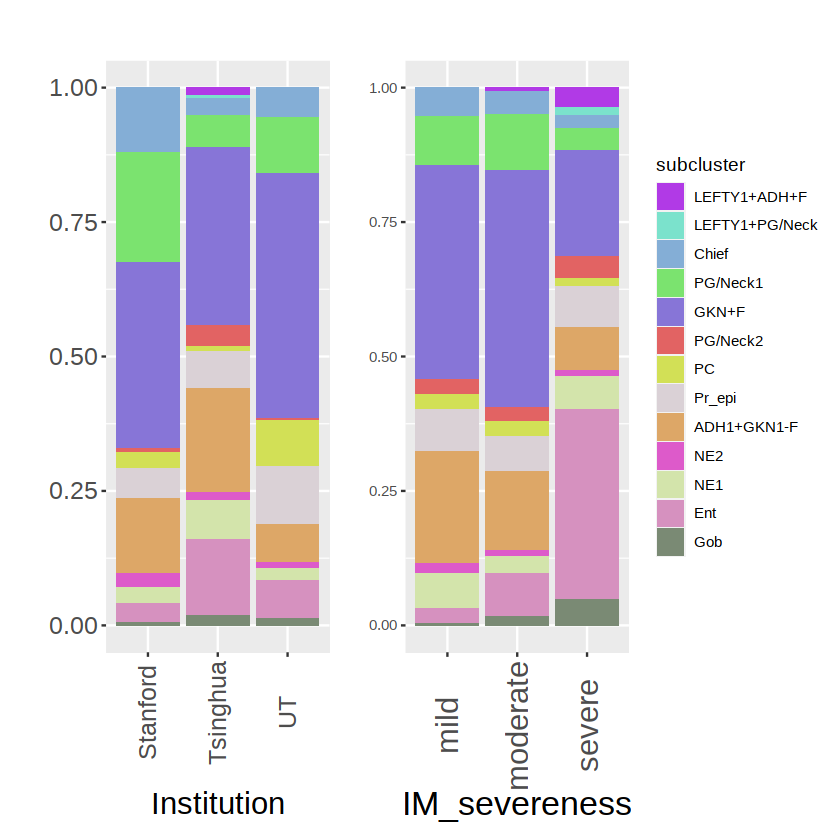

In [709]:
p5 | p6

### こだわる場合

In [57]:
options(repr.plot.width=10, repr.plot.height=6)

p4 <- ggplot(meta, aes(x=subcluster, fill=Phase)) +
geom_bar(aes(y = (..count..)),position='fill') +
ggtitle("Cell Cycle Ratio of Each Cluster")+
#facet_grid(TN~TB) + 
scale_y_continuous(expand = c( 0, 0 ) )+ # 上図にある余白をなくした
NoGrid()+ # gridなし
xlab("") +
ylab("") + 
#opts(axis.text.x=theme_text(angle=90)) +
theme(axis.text.x = element_text(angle = 0, vjust=0.5,size=16),
      axis.text.y = element_text(angle = 0, vjust=0.5,size=16),
     plot.title=element_text(family="Times", face="bold", colour="black",size=20,hjust = 0.5),
     legend.title = element_text(size=14), #change legend title font size
        legend.text = element_text(size=12),legend.position = 'bottom',
     panel.background = element_blank(),
     panel.border = element_rect(fill = NA, size=1))+ # figの周りが黒線でかこまれる
coord_flip() #change legend text font size) 
#scale_fill_manual(values = unlist(colors[3]))
#ggsave("/home/tsubosaka/integrated_data/fig/num_celltypes_samples.pdf", width=10,height=5)

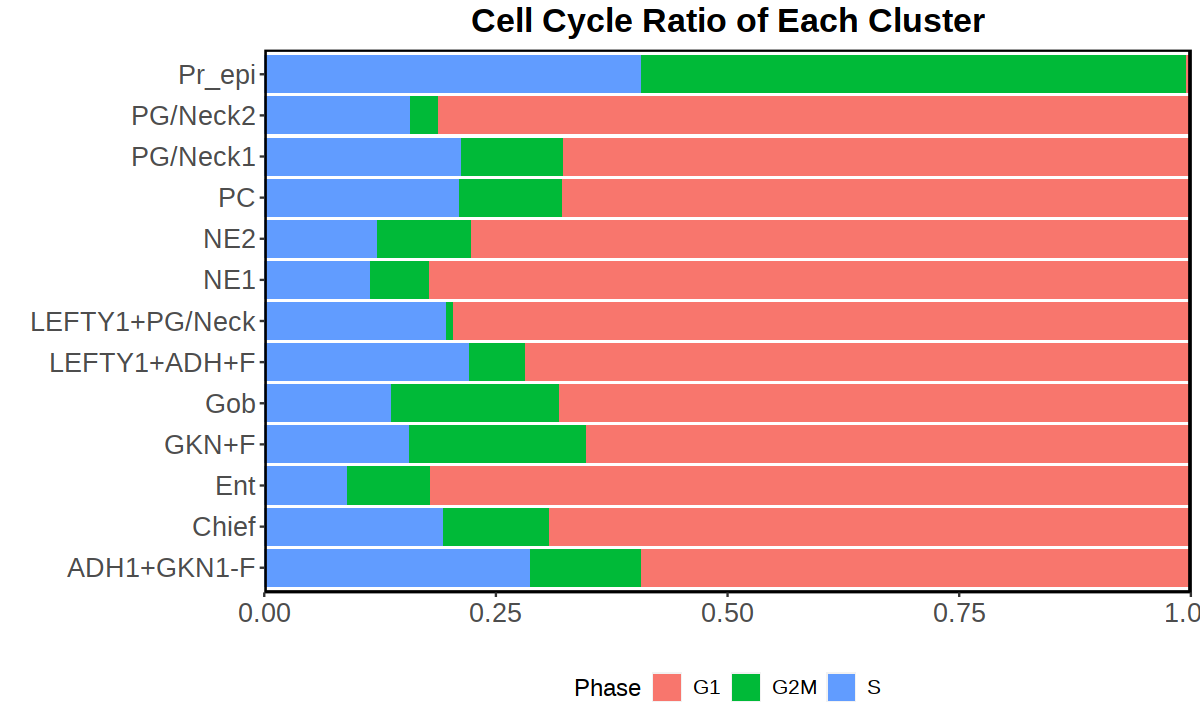

In [58]:
p4

## 5. Cellchat reorder

In [6]:
#Set desired cell order
cell.levels <- c("GKN+F", 'ADH1+GKN1-F',"PG/Neck1","PG/Neck2", "Pr_epi","Chief", "PC",
                "Ent", "Gob","LEFTY1+ADH+F", "LEFTY1+PG/Neck","NE1", "NE2",
                "CD8_T", "activated_T","γδT", "CD4+T","IgA-P", "IgA/M-P",
                "IgM-P", "IgG-P","IgD+B", "HSP+MZB","MZB", "CD45-GCB",
                "CD45+GCB", "NR4A+B","NS_B", "KLF4+FB","PDGFRA+FB", "SM",
                "CCL11+FB", "MFB","FibSmo", "monocyte","Mp", "DC",
                "mast", "HEV","ACKR1+EC", "FN1_EC","PLVAP+EC"
                )

#stash cell labels in scRNA object metadata
seurat_subsetted$cellgroup <- Idents(seurat_subsetted)

#Add cell labels to cellchat metadata
identity = data.frame(group = seurat_subsetted$cellgroup, row.names = names(seurat_subsetted$cellgroup))
#unique(identity$group)
cellchat <- addMeta(cellchat, meta = identity, meta.name = "cell_type")
levels(cellchat@idents) #check idents are correct


ERROR: Error in Idents(seurat_subsetted): could not find function "Idents"


## 6. Blend feature plot

In [5]:
blend.features = c('LEFTY1','EPHB2')
cells.sort <- Cells(aaa)[ order(GetAssayData(aaa,slot = "data")[blend.features[1],],
                                     GetAssayData(aaa,slot = "data")[blend.features[2],],
                                     decreasing = F)]

In [40]:
# sorted plot
options(repr.plot.width=28, repr.plot.height=7)
p <- FeaturePlot(aaa, features = c('LEFTY1','EPHB2'), blend = TRUE, pt.size = 1, order=TRUE, blend.threshold=0.1)

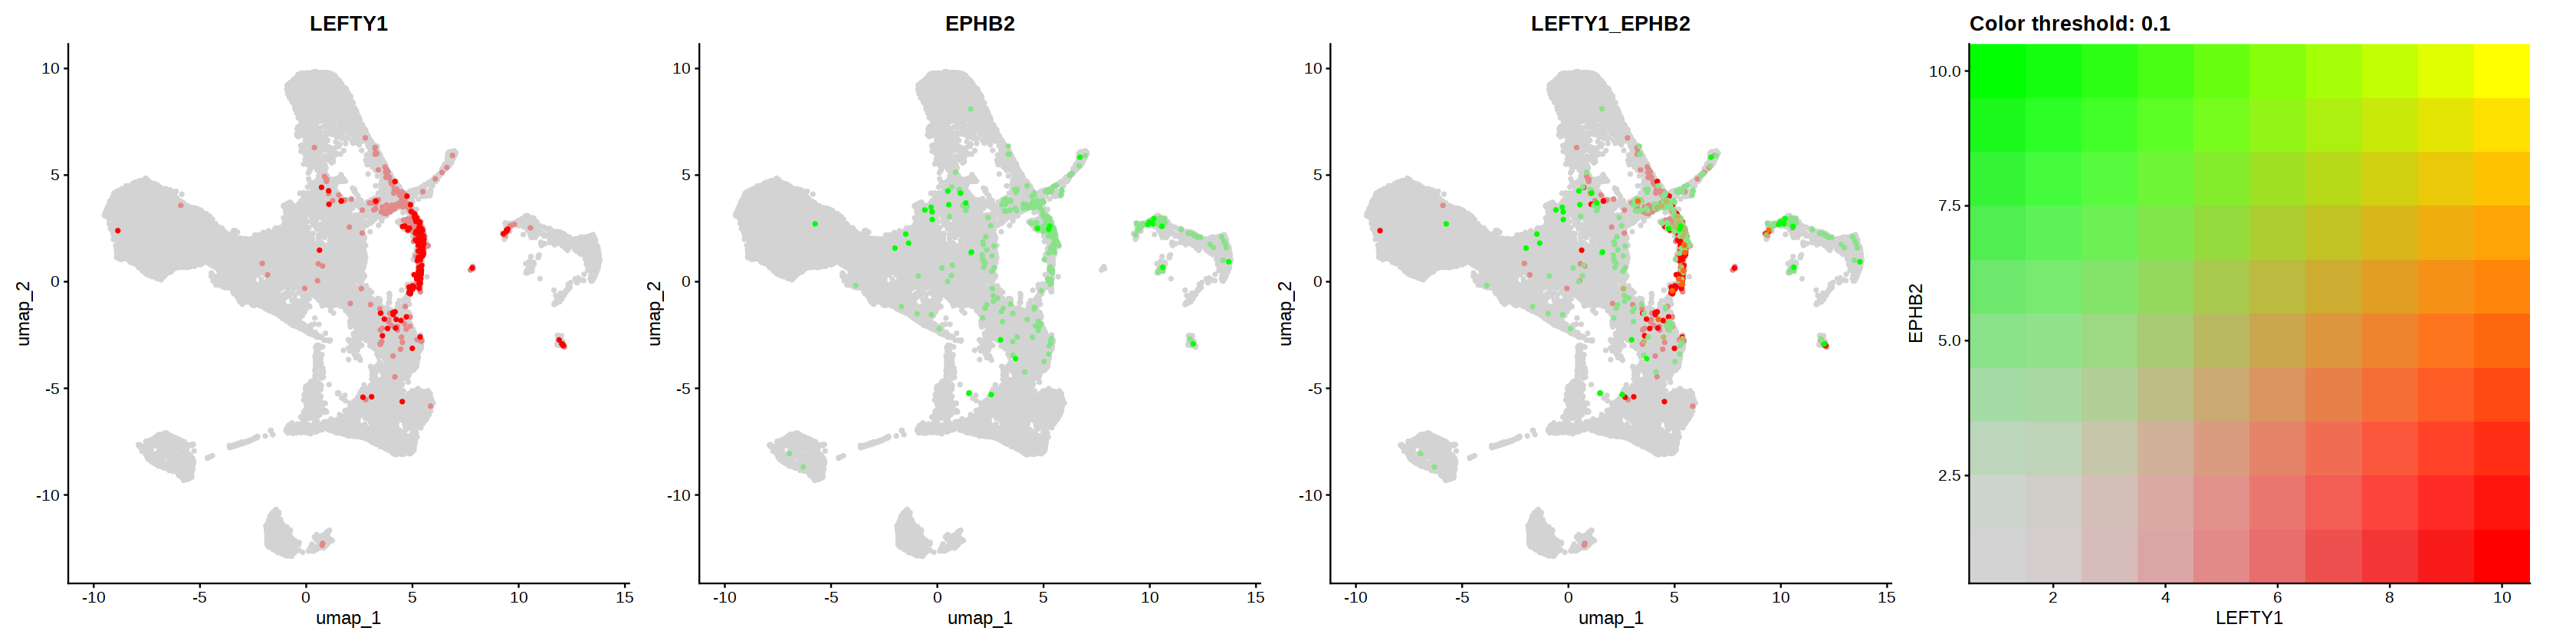

In [41]:
p 

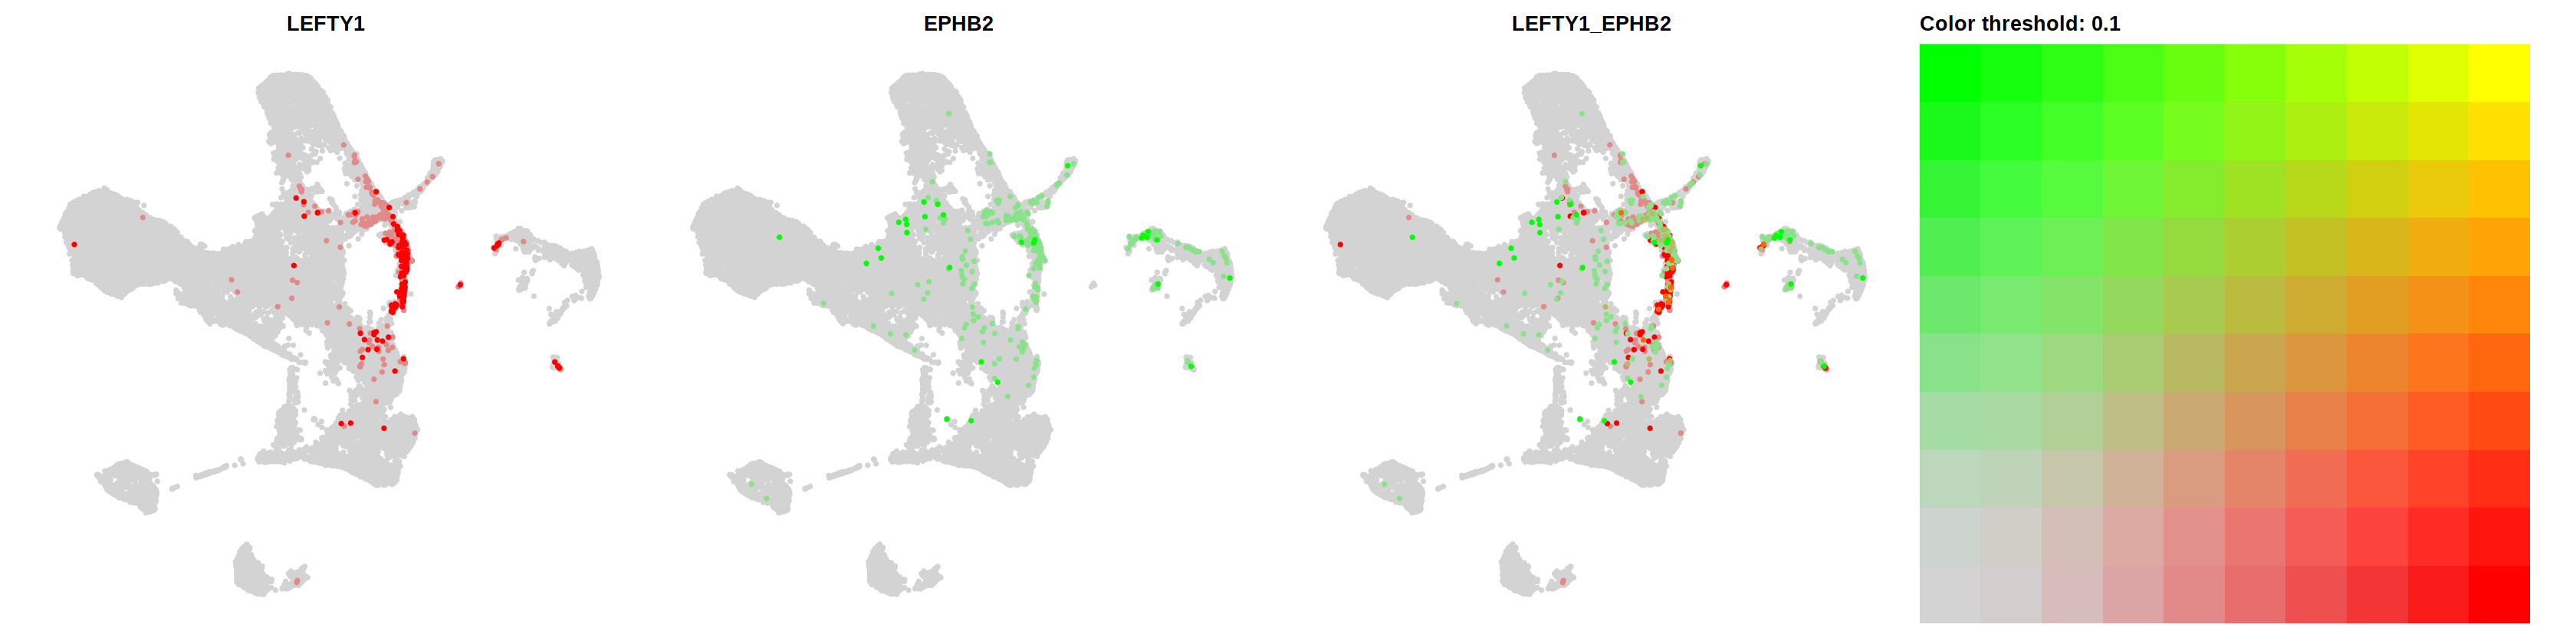

In [42]:
p & NoAxes()

## 7. Featureplot　sort
### 発現している細胞が少ない遺伝子はFeatureplotで見えないことがあった
### order=TRUEのoptionを加えることで、そういった遺伝子もみやすく

In [10]:
p1b <- FeaturePlot(epi, features = c('ASCL2','TNFRSF19','AQP5',
                             'EPHB2','SMOC2','OLFM4'),order=TRUE,ncol=3)&NoLegend()&NoAxes()

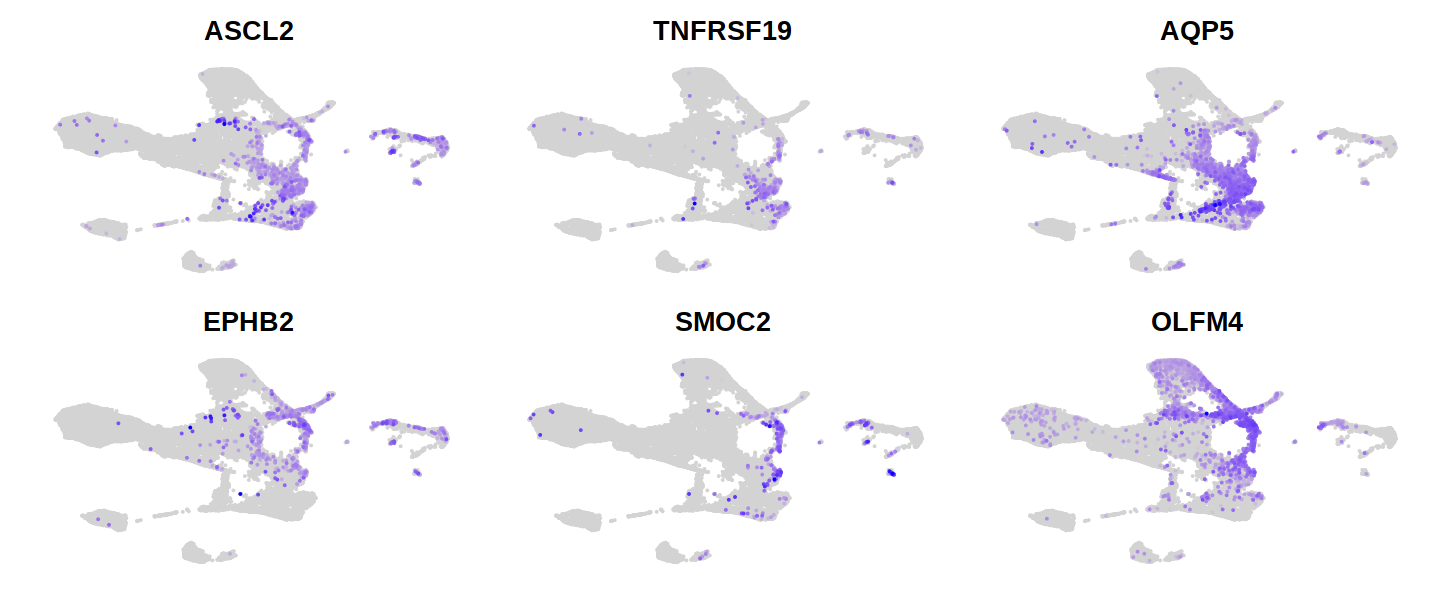

In [11]:
# order=TRUE
p1b

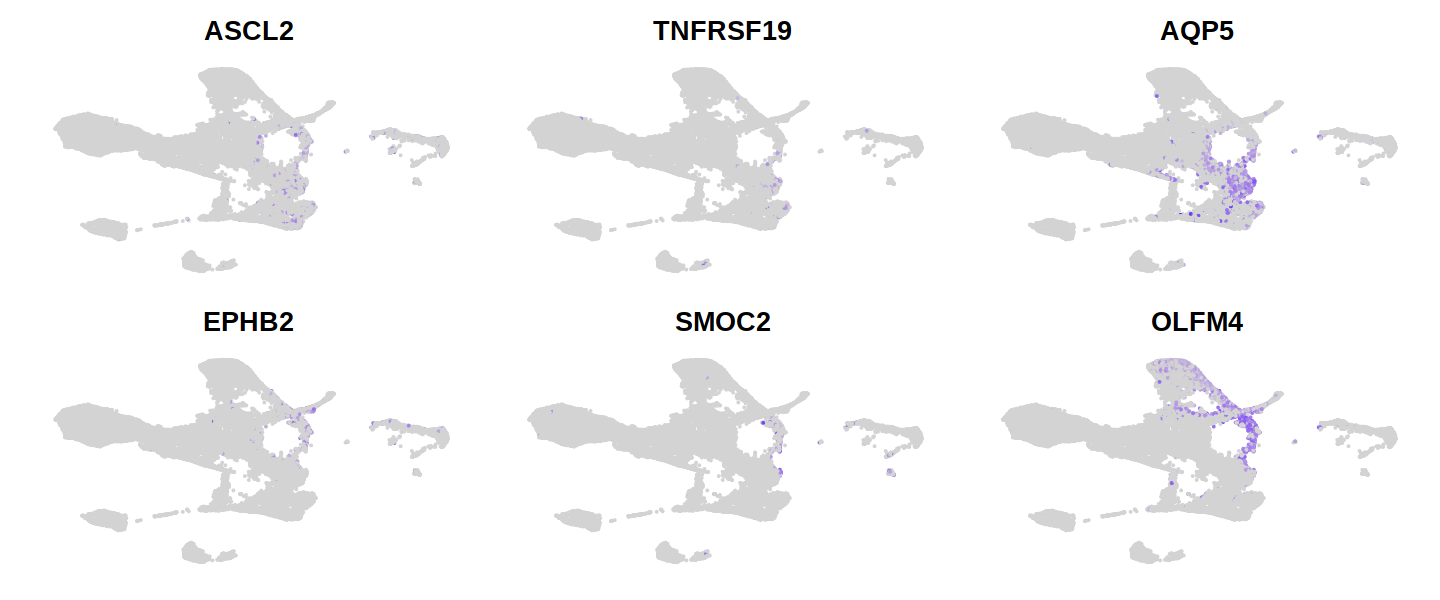

In [15]:
# order=FALSE
p1b